# Analysis Demonstration for the Paper "Information Dynamics of a Nonlinear Stochastic Nanopore System"
## Load in the required Python packages.


In [ ]:
%matplotlib inline



In [3]:
import numpy
numpy.random.seed(1)

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx

from sidpy import *

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 18)

### Set parameters for data length, inference, etc.


In [4]:
p_max = 10

nn_package = 'sklearn' # Deterministic, but slower.
# nn_package = 'pyflann' # Fast approximation, but non-deterministic.

# Determines the upper bound on the number of nearest neighbors to use
# for the computation of NLPL:

pow_upperbound = 0.5

# Determines the number of nearest neighbors to use in estimating 
# the specific entropy rate and normalized q-step specific entropy
# rate.

pow_neighbors = 0.5

# Specify whether the data is by-trial / epoched (multirealization)
# or not.

is_multirealization = False

In [8]:
raw = numpy.loadtxt('NRK5.txt')
x = raw[::2]

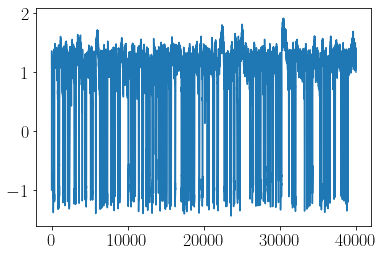

In [9]:
plt.plot(x)

In [10]:
p_opt, nlpl_opt, nlpl_by_p, er_knn, ler_knn = choose_model_order_nlpl(x, p_max, pow_upperbound = pow_upperbound, nn_package = nn_package, is_multirealization = is_multirealization, announce_stages = False, output_verbose = True)
print('Chose p* = {}, giving ER(p*) = {}'.format(p_opt, er_knn))


For p = 0, with NLPL(k = 5) = 0.33785117018334504


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


####################################################
# Warning: For p = 1, Nelder-Mead is choosing k* near k_upper = 200.
# Increase pow_upperbound.
####################################################
For p = 1, with NLPL(h* = 0.038645851009031416, k* = 200) = -1.1282177852527893


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 2, with NLPL(h* = 0.039783529850464155, k* = 110) = -1.1879559762580343


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 3, with NLPL(h* = 0.03806606093967061, k* = 102) = -1.20392631726094


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 4, with NLPL(h* = 0.03799835389151896, k* = 90) = -1.206714519747076


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 5, with NLPL(h* = 0.03742066741964738, k* = 91) = -1.2029280583724857


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 6, with NLPL(h* = 0.03692805066192553, k* = 89) = -1.1992532282351758


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 7, with NLPL(h* = 0.03868943021535678, k* = 72) = -1.1932487986961184


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 8, with NLPL(h* = 0.038820668679331774, k* = 73) = -1.1868447710098908


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 9, with NLPL(h* = 0.03999742392423574, k* = 61) = -1.1813056862245177


/Users/s02435/ghq/github.com/nnao45/jaist-my-jupyter/.venv/lib/python3.8/site-packages/sidpy.py:1337: RuntimeWarning: divide by zero encountered in log
  log_fs = numpy.log(fs)


For p = 10, with NLPL(h* = 0.040465938809321436, k* = 61) = -1.174990508128742
Chose p* = 4, giving ER(p*) = -1.2573779337510909


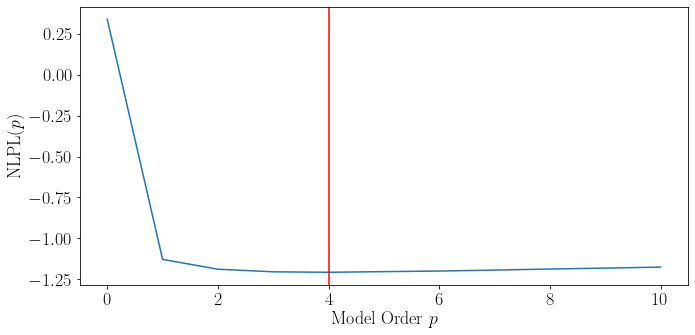

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(range(0, p_max + 1), nlpl_by_p)
plt.xlabel('Model Order $p$')
plt.ylabel('NLPL$(p)$')
plt.axvline(p_opt, color = 'r')
plt.tight_layout()

In [12]:
print('Estimating local entropy rate in-sample...')

ler = estimate_ler_insample(x, p_opt = p_opt, pow_neighbors = pow_neighbors)

Estimating local entropy rate in-sample...


In [13]:
print('Estimating specific entropy rate in-sample...')

ser = estimate_ser_insample(x, ler_knn, p_opt = p_opt, pow_neighbors = pow_neighbors)

Estimating specific entropy rate in-sample...


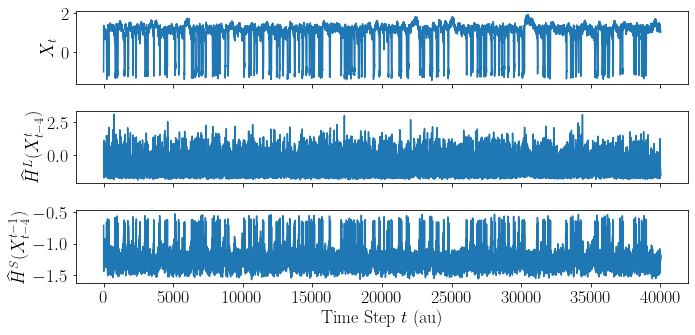

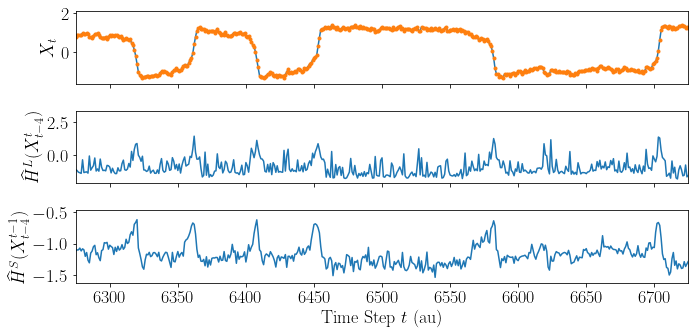

In [14]:
# Compare time series, LER, and SER for the full time series.

fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 5))
ax[0].plot(x)
ax[0].set_ylabel('$X_{t}$')
ax[1].plot([numpy.nan]*p_opt + ler.tolist())
ax[1].set_ylabel('$\\widehat{{H}}^{{L}}(X_{{t-{}}}^{{t}})$'.format(p_opt))
ax[2].plot([numpy.nan]*p_opt + ser.tolist())
ax[2].set_ylabel('$\\widehat{{H}}^{{S}}(X_{{t-{}}}^{{t-1}})$'.format(p_opt))
ax[2].set_xlabel('Time Step $t$ (au)')
plt.tight_layout()

fig, ax = plt.subplots(3, 1, sharex = True, figsize = (10, 5))
ax[0].plot(x)
ax[0].plot(x, '.')
ax[0].set_ylabel('$X_{t}$')
ax[1].plot([numpy.nan]*p_opt + ler.tolist())
ax[1].set_ylabel('$\\widehat{{H}}^{{L}}(X_{{t-{}}}^{{t}})$'.format(p_opt))
ax[2].plot([numpy.nan]*p_opt + ser.tolist())
ax[2].set_ylabel('$\\widehat{{H}}^{{S}}(X_{{t-{}}}^{{t-1}})$'.format(p_opt))
ax[2].set_xlabel('Time Step $t$ (au)')
ax[2].set_xlim([6275, 6725])
plt.tight_layout()